# Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
FP = 'C:\Users\Sam\Desktop\MPP\PROJECTS\DATAQUEST\PROJECTS\Guided Project_Analyzing_Movie_Reviews\score_comparison.csv'
movies = pd.read_csv(FP)
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


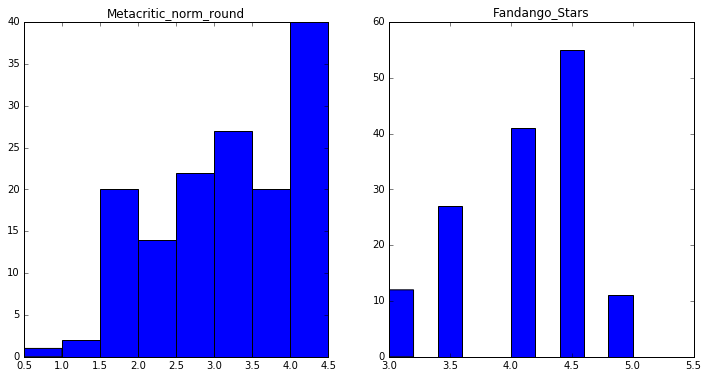

In [3]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(movies['Metacritic_norm_round'],bins=8)
ax2.hist(movies['Fandango_Stars'])
ax1.set_title('Metacritic_norm_round')
ax2.set_title('Fandango_Stars')
plt.show()

# Fandango vs Metacritic Scores
Metacritics ratings are more normally distributed as compared to Fandango. Fandango tends to rate higher. The minimum Fandango ratings is 3 stars whereas 0.5 for Metacritic

# Calculating Mean, Median, And Standard Deviation

In [4]:
fandango_mean = np.mean(movies['Fandango_Stars'])
metacritic_norm_round_mean = np.mean(movies['Metacritic_norm_round'])
fandango_median = np.median(movies['Fandango_Stars'])
metacritic_norm_round_median = np.median(movies['Metacritic_norm_round'])
fandango_std = np.std(movies['Fandango_Stars'])
metacritic_norm_round_std = np.std(movies['Metacritic_norm_round'])
print(fandango_mean)
print(metacritic_norm_round_mean)
print(fandango_median)
print(metacritic_norm_round_median)
print(fandango_std)
print(metacritic_norm_round_std)

4.08904109589
2.97260273973
4.0
3.0
0.53853216127
0.987561029704


# Fandango vs Metacritic Methodology


Fandango appears to inflate ratings and isn't transparent about how it calculates and aggregates ratings. Metacritic publishes each individual critic rating, and is transparent about how they aggregate them to get a final rating.

# Fandango vs Metacritic number differences

The median metacritic score appears higher than the mean metacritic score because a few very low reviews "drag down" the median. 

The median fandango score is lower than the mean fandango score because a few very high ratings "drag up" the mean.

Fandango ratings appear clustered between 3 and 5, and have a much narrower random than Metacritic reviews, which go from 0 to 5.

Fandango ratings in general appear to be higher than metacritic ratings.

These may be due to movie studio influence on Fandango ratings, and the fact that Fandango calculates its ratings in a hidden way

# Scatter Plot

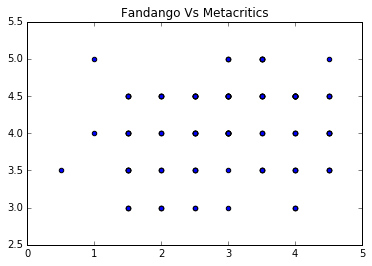

In [5]:
plt.scatter(movies['Metacritic_norm_round'],movies['Fandango_Stars'])
plt.title('Fandango Vs Metacritics')
plt.show()

# Several movies appear to have low ratings in Metacritic and high ratings in Fandango, or vice versa. We can explore this further by finding the differences between the columns

In [6]:
movies['fm_diff'] = abs(movies['Fandango_Stars'] - movies['Metacritic_norm_round'])
movies = movies.sort_values('fm_diff',ascending=False)
movies.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


# 5: Correlations

In [7]:
from scipy.stats import pearsonr, linregress
correlation = pearsonr(movies['Fandango_Stars'],movies['Metacritic_norm_round'])
r_value = correlation[0]
p_value = correlation[1]
print(correlation)
print(r_value)
print(p_value)

(0.17844919073895918, 0.031161516228523815)
0.178449190739
0.0311615162285


# Fandango and Metacritic Correlation

The low correlation between Fandango and Metacritic scores indicates that Fandango scores aren't just inflated, they are fundamentally different. 
For whatever reason, it appears like Fandango both inflates scores overall, and inflates scores differently depending on the movie.

In [8]:
reg = linregress(movies['Metacritic_norm_round'],movies['Fandango_Stars'])
print(reg) 
slope = reg[0]
intercept = reg[1]

LinregressResult(slope=0.09731107797392835, intercept=3.7997739188994188, rvalue=0.17844919073895896, pvalue=0.031161516228524269, stderr=0.044713544656798297)


In [9]:
pred_3 = 3 * slope + intercept
pred_3

4.0917071528212041

# Finding Residuals

In [10]:
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept

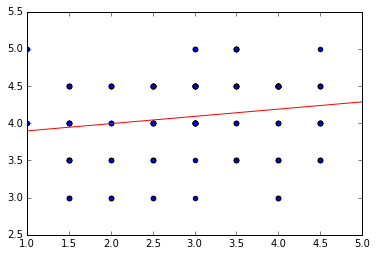

In [11]:
plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
plt.plot([1.0,5.0],[pred_1, pred_5],color='r')
plt.xlim(1,5)
plt.show()